In [167]:
import matplotlib.pyplot as plt
%matplotlib inline # plots inside IPython notebook cells
import numpy as np
import pandas as pd

# Matplotlib

https://matplotlib.org/index.html

In the following it is assumed that the reader is familar with [Numpy](numpy.ipynb) and [Pandas](pandas.ipynb).

## Matlab-Style API (pyplot)

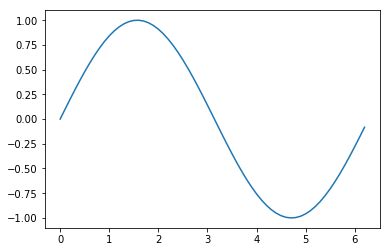

In [100]:
x = np.arange(0, 2*np.pi, 0.1) # numpy array
y = np.sin(x) # also a numpy array
plt.plot(x, y)

The *plot* function takes an array-like object as x and y values. Usually a Numpy array is used, but lists, etc. also work.

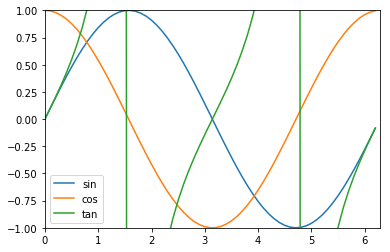

In [97]:
plt.plot(x, np.sin(x), 
         x, np.cos(x), 
         x, np.tan(x))
plt.axis([0, 2*np.pi, -1, 1])
plt.legend(['sin', 'cos', 'tan'])

Plotting multiple (x,y) pairs using a user-defined axis and legend.

Note that the modifications of the axis and the legend are done directly on the *plt* object, which is implicitly referring to the current plot, not explicitly on the plot itself.
This syntax is similar to Matlab, therefore it is called "Matlab-stype API".

The Matlab-style API (using *matplotlib.pyplot*) is usually faster to implement than the object-oriented API, but less explicit. Therefore, for more complex code usage of the object-oriented API is recommended.

## Object-Oriented API

In [156]:
fig = plt.figure()
fig.suptitle('my figure')

Text(0.5, 0.98, 'my figure')

<Figure size 432x288 with 0 Axes>

A figure object is defined, which can contain one or more plots.

A figure is plotted in one notebook cell or displayed in one window.

In [157]:
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('plot 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('plot 2')

Text(0.5, 1.0, 'plot 2')

The plots inside a figure are called __axes__ (not to be confused with axis!).

Here, 2 subplots are defined using the syntax

    figure.add_subplot(nr_rows, nr_columns, plot_number)

In [158]:
ax1.plot(x, np.sin(x))
ax1.plot(x, np.cos(x))
ax1.legend(['sin', 'cos'])
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x) or cos(x)')

Text(0, 0.5, 'sin(x) or cos(x)')

In [159]:
ax2.plot(x, np.tan(x))
ax2.legend(['tan'])
ax2.axis([0, max(x), -1, 1])
ax2.set_xlabel('x')
ax2.set_ylabel('tan(x)')

Text(0, 0.5, 'tan(x)')

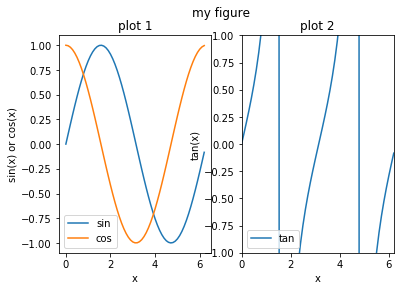

In [160]:
fig

There is implicit referencing to subplots (via *plt*) anymore, but clear and explicit references to the plots which are modified.

The plot formatting is however broken.

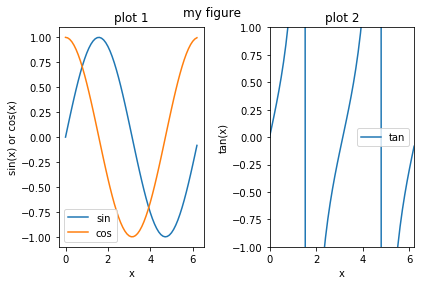

In [161]:
fig.tight_layout()
fig

Automatic reformatting so that axis labels, etc. are displayed correctly.

The methods invoked on *plt* in the Matlab stype API are usually invoked either on figures or axes the object-oriented API.

Although the object-oriented API may result in slightly longer code, it is preferred because explicit is better than implicit (Zen of Python).

## Plotting from Pandas

In [93]:
df = pd.DataFrame(index=np.arange(0, 2*np.pi, 0.1))
df['sin'], df['cos'], df['tan'] = np.sin(df.index), np.cos(df.index), np.tan(df.index)
df.head()

,sin,cos,tan
0.0,0.000000,1.000000,0.000000
0.1,0.099833,0.995004,0.100335
0.2,0.198669,0.980067,0.202710
0.3,0.295520,0.955336,0.309336
0.4,0.389418,0.921061,0.422793


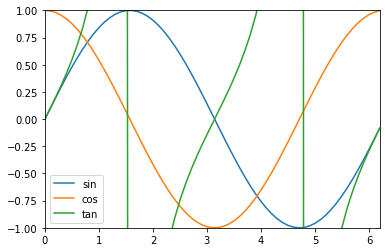

In [95]:
df.plot()
plt.axis([0, max(df.index), -1, 1])
plt.legend()

Plotting Matlab-style

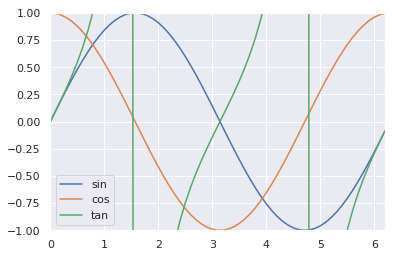

In [199]:
fig2, axes = plt.subplots()
df.plot(ax=axes) # note that the axes object is passed to the DataFrame plot method
axes.axis([0, max(df.index), -1, 1])
axes.legend()

Plotting with object-oriented API.

# Seaborn

https://seaborn.pydata.org/tutorial.html

Seaborn is a high-level data visualization library based on Matplotlib.

In [174]:
import seaborn as sns
sns.set(style="darkgrid")

In [188]:
tips = sns.load_dataset('tips') # built-in example dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Visualization of Relationships

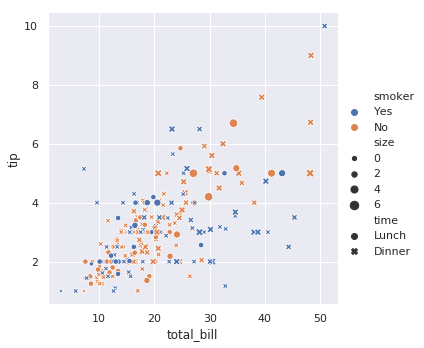

In [214]:
sns.relplot(x='total_bill', # x axis
            y='tip', # y axis
            hue='smoker', # symbol color
            style='time', # symbol shape
            size='size', # symbol size
            data=tips) # input DataFrame

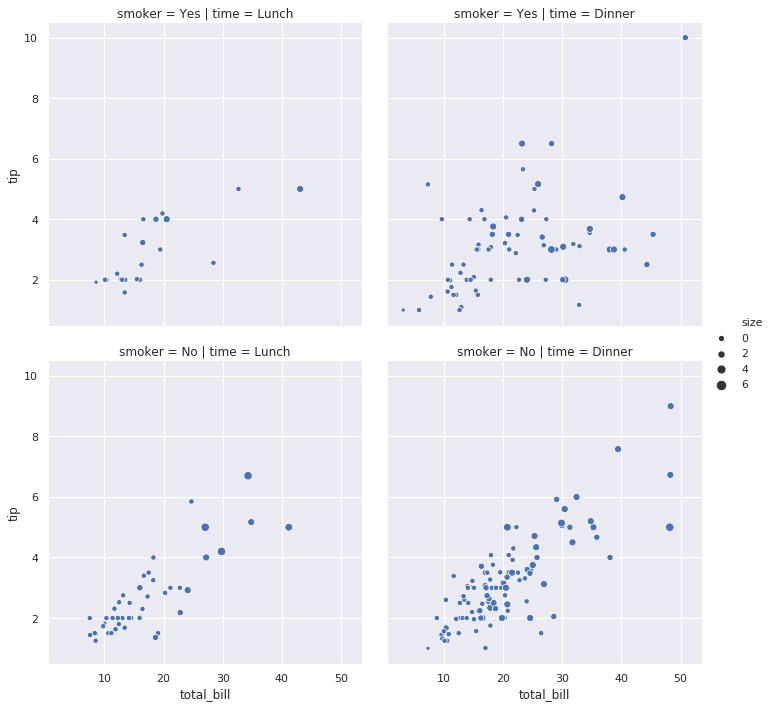

In [222]:
sns.relplot(x='total_bill', # x axis
            y='tip', # y axis
            row='smoker', # subplot row
            col='time', # subplot column
            size='size', # symbol size
            data=tips) # input DataFrame

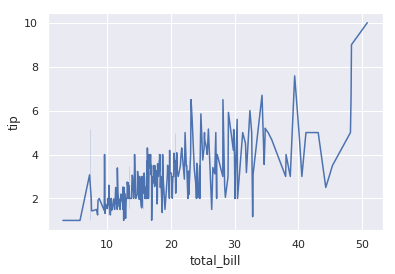

In [200]:
sns.lineplot(x='total_bill', # x axis
            y='tip', # y axis
            data=tips)

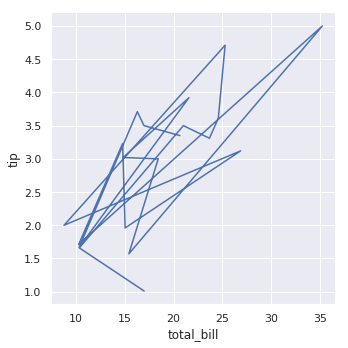

In [211]:
sns.relplot(x='total_bill', # x axis
            y='tip', # y axis
            kind='line', # this setting makes relplot equivalent to lineplot
            sort=False, # does not sort plotted points along their x-axis
            data=tips.head(20))

## Plotting with Confidence Intervals

In [203]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [208]:
fmri.groupby('timepoint').agg({'signal': ['count', np.min, np.max, np.mean]}).head()

signal                              
           count      amin      amax      mean
timepoint                                     
0             56 -0.064454  0.074399 -0.016662
1             56 -0.082174  0.063558 -0.025002
2             56 -0.110565  0.077277 -0.012873
3             56 -0.089708  0.185581  0.034446
4             56 -0.046347  0.346775  0.098194

Example dataset with multiple "measurements" for each x-value.

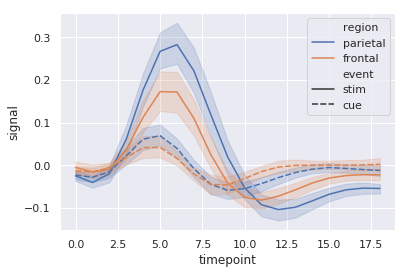

In [220]:
sns.lineplot(x="timepoint", y="signal", 
             hue='region', # color
             style='event', # line style
             ci=90, # confidence interval for error bonds 
             data=fmri)

## Pairwise Data Relationships

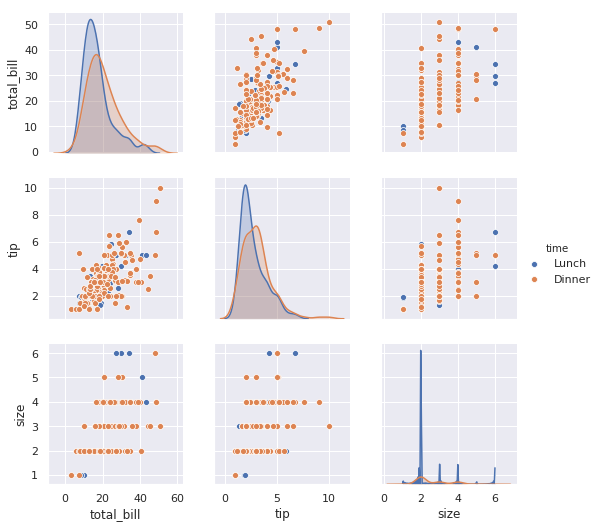

In [238]:
g = sns.pairplot(tips, hue='time')

The *pairplot* method offers a quick way to explore data relationships.
It returns a PairGrid object.

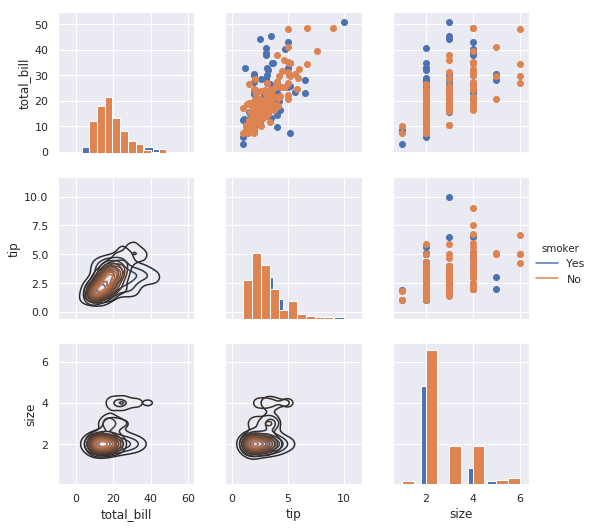

In [240]:
g = sns.PairGrid(data=tips, 
                 hue='smoker') # creates pair-wise grid
g.map_diag(plt.hist) # sets plot type for diagonal elements
#g.map_offdiag(plt.scatter) # sets plot type for off-diagonal elements
g.map_upper(plt.scatter) # sets plot type for elements in upper triangle
g.map_lower(sns.kdeplot) # sets plot type for elements in lower triangle
g.add_legend()

Alternatively, a PairGrid may be defined manually, which offers more configuration options. The plot types can be configured for the various types of grid elements.

## Histograms

In [241]:
vals = np.random.randn(20)

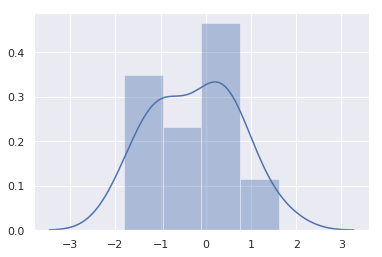

In [245]:
p = sns.distplot(vals)

Plotting histogram with automatic binning and Kernel Density Estimator (KDE) line.

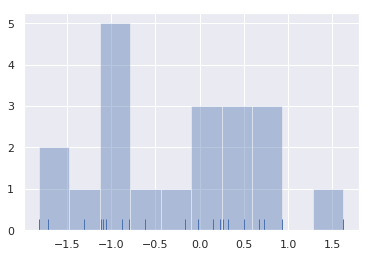

In [244]:
sns.distplot(vals, 
             kde=False, # KDE line switched off
             rug=True, # rug plot: small lines on bottom of x axis for every measurement
             bins=10, # manually specify number of bins
             )

Without KDE, but with rug plot and manually specified number of bins.

In [249]:
from scipy import stats

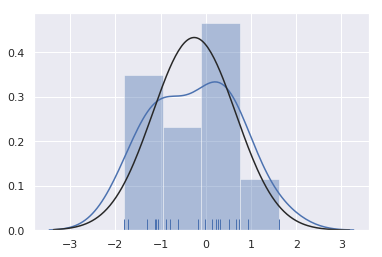

In [252]:
p = sns.distplot(vals, rug=True, fit=stats.norm)

In [251]:
stats.norm.fit(vals)

(-0.2569013749826273, 0.9201909592666747)

Fit functions can be directly drawn into plots using the *fit=* keyword argument.
Note that the fit functions must be objects having the *fit()* method, *scipy.stats* offers a number of common functions.